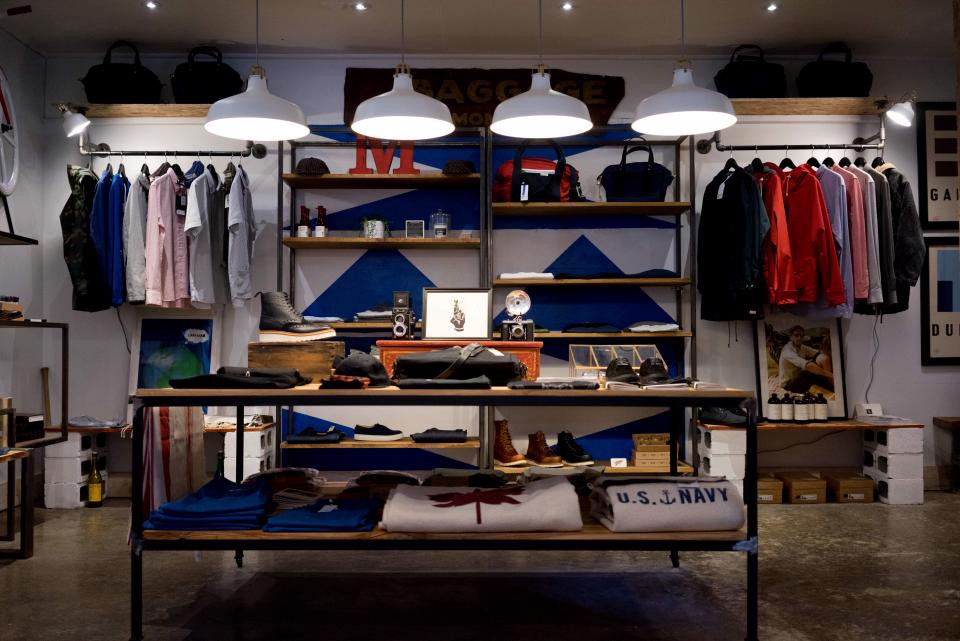

# Fashion Mnist

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,BaggingClassifier,StackingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from xgboost import XGBClassifier
%matplotlib inline

load the data:

In [2]:
df_tr = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
df_te = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels, and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Each number in the 'label' represents a different clothingas follows:

In [3]:
dictionary = {
    0 :'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

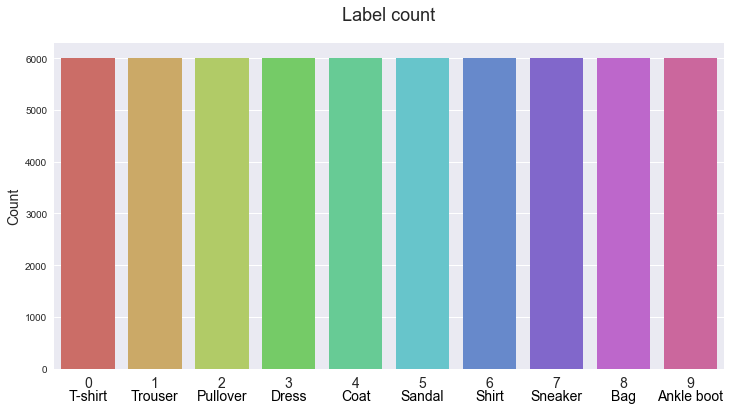

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df_tr, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

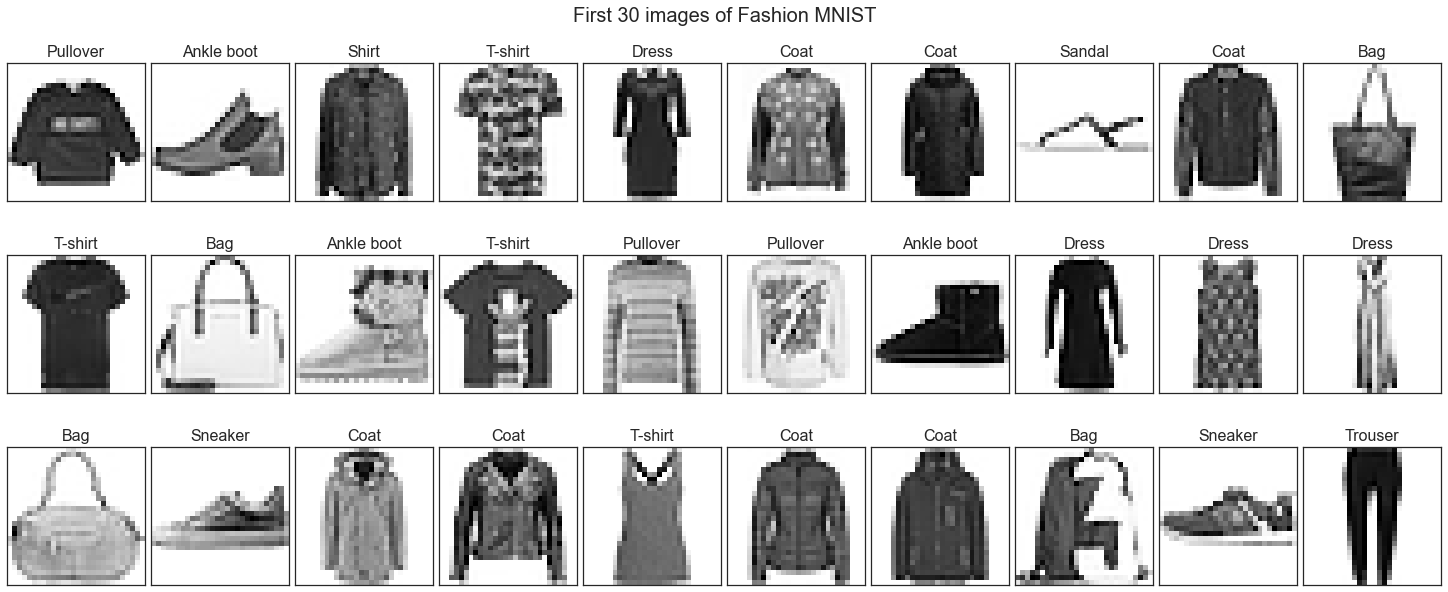

In [5]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df_tr.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df_tr.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [6]:
#show the data
df_tr

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Group each row into an array
X = np.array(df_tr.iloc[:,1:])
y = np.array(df_tr.iloc[:,0])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)


In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
print('dimensions x_train:',x_train.shape)
print('dimensions x_test:',x_test.shape)

dimensions x_train: (54000, 784)
dimensions x_test: (6000, 784)


## PCA

In [10]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

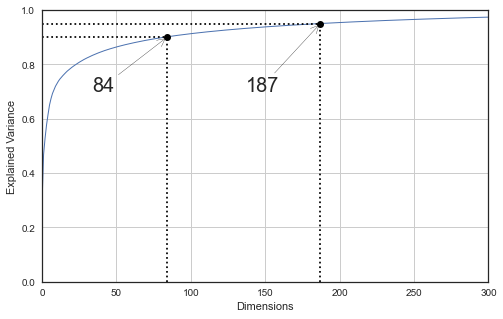

In [11]:

d = np.argmax(cumsum >= 0.95) + 1
d2 = np.argmax(cumsum >= 0.9) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(d, 0.95), xytext=(d-50, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.plot([d2, d2], [0, 0.9], "k:")
plt.plot([0, d2], [0.9, 0.9], "k:")
plt.plot(d2, 0.9, "ko")
plt.annotate(d2, xy=(d2, 0.9), xytext=(d2-50, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

Select dimensions that will give information about 0.9 from the data. 
**Note that there has been a decrease from 784 dimensions to only 84!**

In [10]:
pca = PCA(n_components=0.9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [11]:
print('dimensions x_train_pca:',x_train_pca.shape)
print('dimensions x_test_pca:',x_test_pca.shape)

dimensions x_train_pca: (54000, 84)
dimensions x_test_pca: (6000, 84)


## Model

### Dummy

In [14]:
pipe_dum = Pipeline([
    ('scaler', StandardScaler()),
    ('dummy', DummyClassifier())
])
pipe_dum.fit(x_train_pca, y_train)
dumpred = pipe_dum.predict(x_test_pca)
pred=[]
pred.append(dumpred)
accuracydum=accuracy_score(y_test, dumpred)

In [15]:
print(classification_report(y_test, dumpred,digits=3,target_names=class_names,zero_division =0))

              precision    recall  f1-score   support

     T-shirt      0.000     0.000     0.000       577
     Trouser      0.000     0.000     0.000       588
    Pullover      0.000     0.000     0.000       581
       Dress      0.094     1.000     0.172       563
        Coat      0.000     0.000     0.000       613
      Sandal      0.000     0.000     0.000       650
       Shirt      0.000     0.000     0.000       612
     Sneaker      0.000     0.000     0.000       584
         Bag      0.000     0.000     0.000       629
  Ankle boot      0.000     0.000     0.000       603

    accuracy                          0.094      6000
   macro avg      0.009     0.100     0.017      6000
weighted avg      0.009     0.094     0.016      6000



### Random Forest

In [16]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf.fit(x_train_pca, y_train)
rfpred = pipe_rf.predict(x_test_pca)
pred.append(rfpred)
accuracyrf=accuracy_score(y_test, rfpred)

In [17]:
print(classification_report(y_test, rfpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt      0.797     0.879     0.836       577
     Trouser      0.996     0.963     0.979       588
    Pullover      0.779     0.807     0.793       581
       Dress      0.864     0.892     0.878       563
        Coat      0.806     0.811     0.808       613
      Sandal      0.946     0.943     0.945       650
       Shirt      0.736     0.623     0.674       612
     Sneaker      0.916     0.909     0.912       584
         Bag      0.954     0.960     0.957       629
  Ankle boot      0.929     0.950     0.939       603

    accuracy                          0.874      6000
   macro avg      0.872     0.874     0.872      6000
weighted avg      0.873     0.874     0.873      6000



### Logistic Regression

In [18]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train_pca, y_train)
lrpred = pipe_lr.predict(x_test_pca)
pred.append(lrpred)
accuracylr=accuracy_score(y_test, lrpred)

In [19]:
print(classification_report(y_test, lrpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt      0.777     0.834     0.804       577
     Trouser      0.984     0.969     0.977       588
    Pullover      0.754     0.730     0.742       581
       Dress      0.853     0.869     0.861       563
        Coat      0.752     0.767     0.759       613
      Sandal      0.950     0.934     0.942       650
       Shirt      0.652     0.613     0.632       612
     Sneaker      0.910     0.932     0.920       584
         Bag      0.949     0.952     0.951       629
  Ankle boot      0.950     0.944     0.947       603

    accuracy                          0.855      6000
   macro avg      0.853     0.854     0.854      6000
weighted avg      0.854     0.855     0.854      6000



### KNN

Text(0, 0.5, 'Testing Accuracy')

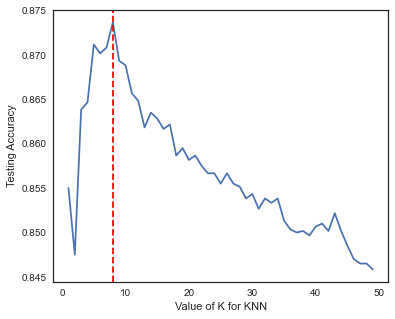

In [20]:
sc=[];k_range = list(range(1, 50))
for k in k_range:
    temppipe=Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    temppipe.fit(x_train_pca, y_train)
    sc.append(temppipe.score(x_test_pca,y_test))
m=sc.index(max(sc))+1
#plot graph showing percentage of accuracy by number of neighbors
f, ax = plt.subplots(figsize = (6,5))
ax.plot(k_range, sc)
ax.axvline(m, ls='--',ymax=max(sc)+0.2,c='r',solid_capstyle='round')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [27]:
m

8

In [21]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=m))
])
pipe_knn.fit(x_train_pca, y_train)
knnpred = pipe_knn.predict(x_test_pca)
pred.append(knnpred)
accuracyknn=accuracy_score(y_test, knnpred)

In [22]:
print(classification_report(y_test, knnpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt      0.758     0.906     0.826       577
     Trouser      0.981     0.978     0.980       588
    Pullover      0.775     0.795     0.785       581
       Dress      0.915     0.897     0.906       563
        Coat      0.820     0.778     0.798       613
      Sandal      0.983     0.902     0.941       650
       Shirt      0.700     0.632     0.664       612
     Sneaker      0.890     0.967     0.927       584
         Bag      0.987     0.933     0.959       629
  Ankle boot      0.935     0.954     0.944       603

    accuracy                          0.874      6000
   macro avg      0.874     0.874     0.873      6000
weighted avg      0.876     0.874     0.873      6000



### Extra Trees

In [23]:
pipe_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train_pca, y_train)
etpred = pipe_et.predict(x_test_pca)
pred.append(etpred)
accuracyet=accuracy_score(y_test, etpred)

In [24]:
print(classification_report(y_test, etpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt      0.769     0.884     0.823       577
     Trouser      0.996     0.968     0.982       588
    Pullover      0.789     0.809     0.799       581
       Dress      0.866     0.906     0.885       563
        Coat      0.811     0.811     0.811       613
      Sandal      0.949     0.935     0.942       650
       Shirt      0.742     0.603     0.665       612
     Sneaker      0.917     0.913     0.915       584
         Bag      0.954     0.955     0.955       629
  Ankle boot      0.926     0.950     0.938       603

    accuracy                          0.873      6000
   macro avg      0.872     0.873     0.871      6000
weighted avg      0.873     0.873     0.872      6000



### XGBoost

In [25]:
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss'))
])
pipe_xgb.fit(x_train_pca, y_train)
xgbpred = pipe_xgb.predict(x_test_pca)
pred.append(xgbpred)
accuracyxgb=accuracy_score(y_test, xgbpred)

In [26]:
print(classification_report(y_test, xgbpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt      0.808     0.880     0.842       577
     Trouser      0.995     0.980     0.987       588
    Pullover      0.839     0.823     0.831       581
       Dress      0.899     0.918     0.909       563
        Coat      0.841     0.843     0.842       613
      Sandal      0.970     0.954     0.962       650
       Shirt      0.756     0.699     0.727       612
     Sneaker      0.932     0.938     0.935       584
         Bag      0.960     0.965     0.963       629
  Ankle boot      0.949     0.955     0.952       603

    accuracy                          0.896      6000
   macro avg      0.895     0.896     0.895      6000
weighted avg      0.896     0.896     0.895      6000



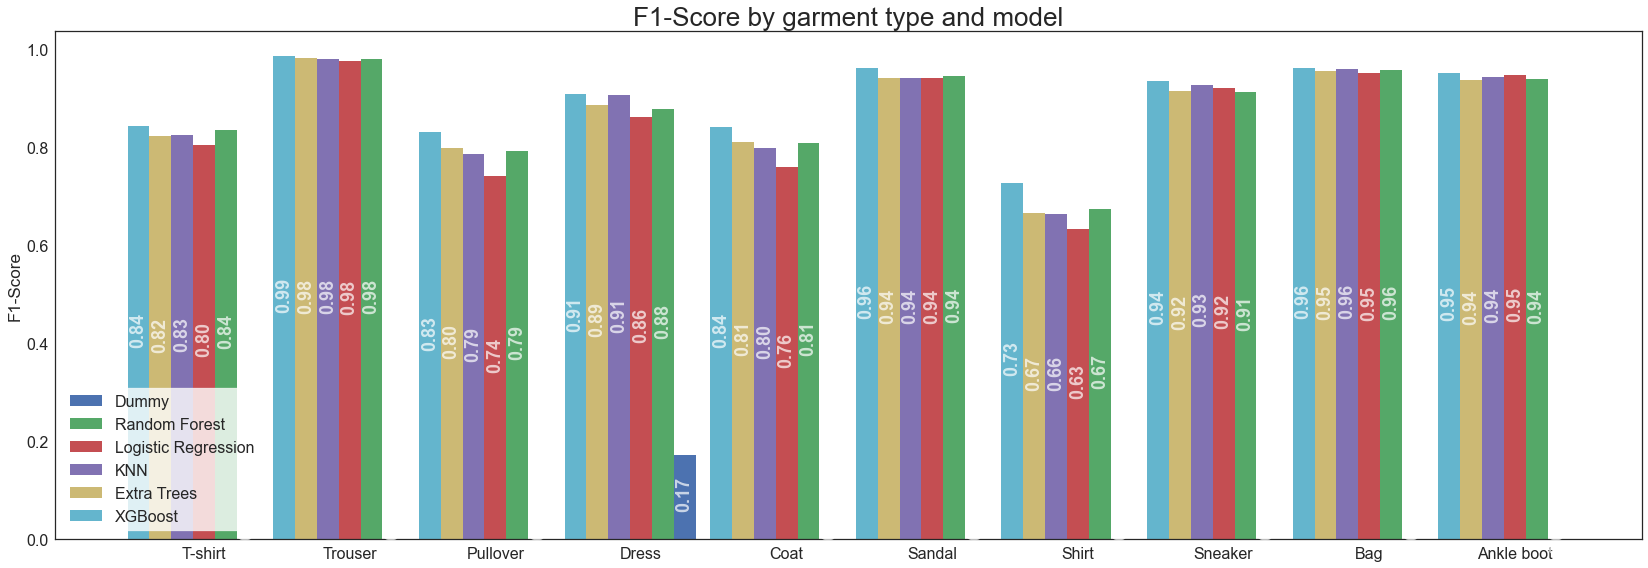

In [30]:
rows, cols = (6, 10)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1
    

fig, ax = plt.subplots(figsize = (23,8))
width = 0.3;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(6):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

ax.set_ylabel('F1-Score',fontsize=17)
ax.set_title('F1-Score by garment type and model',fontsize=26)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Dummy','Random Forest','Logistic Regression','KNN','Extra Trees','XGBoost'],frameon = 2,loc='lower left',
         fontsize =16)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=18,rotation=90,alpha=0.7)
for i in range(6):
    axeplot(rect[i])


fig.tight_layout()

## Tuning

**Random Search for Random Forest**

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [24]:
rf_random = RandomizedSearchCV(estimator = pipe_rf, param_distributions = random_grid, cv = 5, n_jobs = -1)
rf_random.fit(x_train_pca, y_train)

rf_random.best_params_

{'rf__n_estimators': 1000,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': 20,
 'rf__bootstrap': False}

In [25]:
rf_random.best_score_

0.8706111111111111

**Random Search for Extra Trees**

In [34]:
random_grid = {'et__n_estimators': n_estimators,
               'et__max_features': max_features,
               'et__max_depth': max_depth,
               'et__min_samples_split': min_samples_split,
               'et__min_samples_leaf': min_samples_leaf,
               'et__bootstrap': bootstrap}
et_random = RandomizedSearchCV(estimator = pipe_et, param_distributions = random_grid, cv = 5, n_jobs = -1)
et_random.fit(x_train_pca, y_train)

et_random.best_params_

{'et__n_estimators': 800,
 'et__min_samples_split': 2,
 'et__min_samples_leaf': 1,
 'et__max_features': 'sqrt',
 'et__max_depth': 50,
 'et__bootstrap': False}

In [35]:
et_random.best_score_

0.8708148148148147

In [13]:
#Save best_params_
par_et={'n_estimators': 800,'min_samples_split': 2,'min_samples_leaf': 1,'max_features': 'sqrt','max_depth': 50,
'bootstrap': False}
par_rf={'n_estimators': 1000,'min_samples_split': 5,'min_samples_leaf': 1,'max_features': 'auto','max_depth': 20,'bootstrap': False}


**Random Search for XGBoost**

In [26]:
maxd = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
n_est= [200, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
lr= [0.1, 0.01,0.2,0.3, 0.05]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bylevel=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_child_weight=[0.5, 1.0, 3.0, 5.0, 7.0, 10.0]
gamma=[0, 0.25, 0.5, 1.0]
reg_lambda= [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = dict(xgb__n_estimators=n_est,xgb__learning_rate=lr,xgb__colsample_bytree=colsample_bytree,
                  xgb__subsample=subsample,
                  xgb__colsample_bylevel=colsample_bylevel,
                  xgb__min_child_weight=min_child_weight,
                  xgb__reg_lambda=reg_lambda,
                  xgb__gamma=gamma,
                  xgb__max_depth=maxd)

In [28]:
xg_grid = RandomizedSearchCV(estimator = pipe_xgb, param_distributions = parameters, cv = 3, n_jobs = -1)
xg_grid.fit(x_train_pca, y_train)

xg_grid.best_params_

{'xgb__subsample': 0.9,
 'xgb__reg_lambda': 0.1,
 'xgb__n_estimators': 1600,
 'xgb__min_child_weight': 7.0,
 'xgb__max_depth': 60,
 'xgb__learning_rate': 0.05,
 'xgb__gamma': 0,
 'xgb__colsample_bytree': 0.9,
 'xgb__colsample_bylevel': 0.5}

In [29]:
xg_grid.best_score_

0.8860740740740741

It can be seen that RandomGrid for XGBoost did not bring us better results than the first XGB model we trained earlier.

Now look at additional Ensemble models:

### Bagging

In [13]:
pipe_bag = Pipeline([('scaler', StandardScaler()),
        ('bag', BaggingClassifier(base_estimator=ExtraTreesClassifier(**par_et),n_estimators=10, random_state=0))])
pipe_bag.fit(x_train_pca, y_train)
bagpred = pipe_bag.predict(x_test_pca)
accuracybag=accuracy_score(y_test, bagpred)

In [14]:
print(classification_report(y_test, bagpred,digits=4, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt     0.8021    0.8887    0.8432       611
     Trouser     1.0000    0.9452    0.9718       639
    Pullover     0.7739    0.8095    0.7913       609
       Dress     0.8701    0.9085    0.8889       590
        Coat     0.7732    0.8094    0.7909       577
      Sandal     0.9444    0.9308    0.9376       621
       Shirt     0.7699    0.5917    0.6692       605
     Sneaker     0.9185    0.9170    0.9177       578
         Bag     0.9383    0.9630    0.9505       568
  Ankle boot     0.9152    0.9502    0.9324       602

    accuracy                         0.8713      6000
   macro avg     0.8706    0.8714    0.8693      6000
weighted avg     0.8712    0.8713    0.8696      6000



### AdaBoost

In [16]:
pipe_adb = Pipeline([
    ('scaler', StandardScaler()),
    ('adb',AdaBoostClassifier(DecisionTreeClassifier(max_depth=80),n_estimators = 1000, random_state = 0, learning_rate = 0.5))
])
pipe_adb.fit(x_train_pca, y_train)
adbpred = pipe_adb.predict(x_test_pca)
accuracyadb=accuracy_score(y_test, adbpred)

In [17]:
print(classification_report(y_test, adbpred,digits=4, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt     0.7480    0.7602    0.7540       613
     Trouser     0.9385    0.9196    0.9289       597
    Pullover     0.6272    0.6440    0.6355       559
       Dress     0.8113    0.7991    0.8051       667
        Coat     0.6643    0.6321    0.6478       598
      Sandal     0.8576    0.8414    0.8494       580
       Shirt     0.4968    0.5275    0.5117       582
     Sneaker     0.8361    0.8250    0.8305       600
         Bag     0.8819    0.8744    0.8781       581
  Ankle boot     0.8681    0.8876    0.8778       623

    accuracy                         0.7728      6000
   macro avg     0.7730    0.7711    0.7719      6000
weighted avg     0.7749    0.7728    0.7737      6000



### Voting

Run a Voting Model on the following models: KNN, Random Forest, ExtraTrees, XGBoost.

In [16]:
pipe_vote = Pipeline([('scaler', StandardScaler()),
        ('voting_clf', VotingClassifier(estimators=[('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss')),
        ('knn', KNeighborsClassifier(n_neighbors=m)),
        ('rf', RandomForestClassifier(**par_rf)),
        ('erf', ExtraTreesClassifier(**par_et))], voting='soft'))])
pipe_vote.fit(x_train_pca, y_train)
votepred = pipe_vote.predict(x_test_pca)
accuracyvt=accuracy_score(y_test, votepred)

In [18]:
print(classification_report(y_test, votepred2, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.82      0.88      0.85       579
     Trouser       1.00      0.96      0.98       622
    Pullover       0.81      0.83      0.82       596
       Dress       0.90      0.93      0.91       589
        Coat       0.82      0.86      0.84       585
      Sandal       0.99      0.95      0.97       597
       Shirt       0.76      0.65      0.70       612
     Sneaker       0.94      0.97      0.95       574
         Bag       0.97      0.98      0.97       622
  Ankle boot       0.96      0.98      0.97       624

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



### Stacking

Run a Stacking Model on the following models: KNN, Random Forest, ExtraTrees, XGBoost.

In [14]:
pipe_st = Pipeline([('scaler', StandardScaler()),
        ('st',StackingClassifier(estimators=
        [('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss')),
        ('knn', KNeighborsClassifier(n_neighbors=8)),
        ('rf', RandomForestClassifier(**par_rf)),
        ('erf', ExtraTreesClassifier(**par_et))],final_estimator=LogisticRegression(solver='lbfgs', max_iter=1000)))])
pipe_st.fit(x_train_pca, y_train)
stpred= pipe_st.predict(x_test_pca)
accuracyst=accuracy_score(y_test, stpred)

In [20]:
print(classification_report(y_test, stpred,digits=2, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.85      0.85      0.85       587
     Trouser       0.99      0.98      0.99       597
    Pullover       0.81      0.84      0.83       613
       Dress       0.90      0.91      0.91       574
        Coat       0.82      0.83      0.83       600
      Sandal       0.97      0.96      0.96       593
       Shirt       0.74      0.70      0.72       602
     Sneaker       0.95      0.94      0.95       603
         Bag       0.97      0.97      0.97       633
  Ankle boot       0.94      0.97      0.96       598

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



### Summary graph

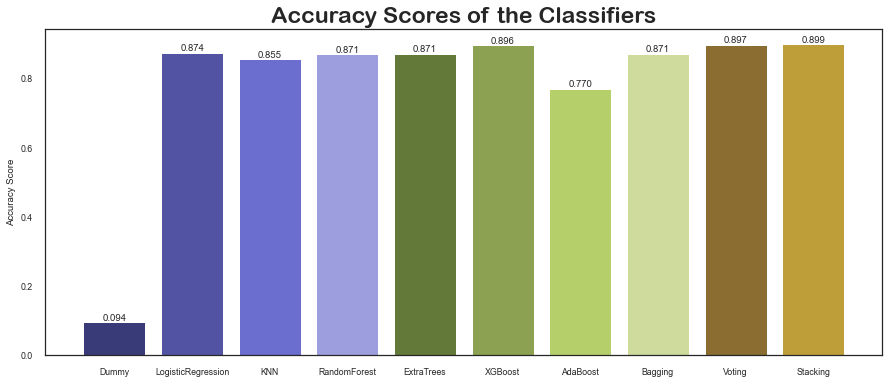

In [114]:
accuracyet=et_random.best_score_
accuracyrf=rf_random.best_score_

accArr = [accuracydum, accuracyknn, accuracylr, accuracyrf, accuracyet, accuracyxgb, accuracyada, accuracybag,
          accuracyvo, accuracyst]
sns.set_style("white")
fig = plt.figure(figsize=(15,6))
labels = ['Dummy','LogisticRegression','KNN', 'RandomForest','ExtraTrees','XGBoost','AdaBoost','Bagging', 'Voting','Stacking']
my_cmap = plt.get_cmap("tab20b")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
ax=plt.bar(labels, accArr,color=my_cmap.colors)
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of the Classifiers",fontsize = 23, fontweight='bold',fontfamily='Arial Rounded MT Bold')
plt.bar_label(ax,fmt='%1.3f')


sns.set(font_scale=0.8)
plt.show()

## Final model

In [15]:
final_x_test = np.array(df_te.iloc[:,1:])
final_y_test = np.array(df_te.iloc[:,0])

In [16]:
# transform the data to adjust it to the number of dimensions of the train
final_x_test=pca.transform(final_x_test)

In [17]:
predfinal=pipe_st.predict(final_x_test)
print(classification_report(final_y_test, predfinal, digits=4,target_names=class_names))

              precision    recall  f1-score   support

     T-shirt     0.8324    0.8590    0.8455      1000
     Trouser     0.9898    0.9740    0.9819      1000
    Pullover     0.8450    0.8070    0.8256      1000
       Dress     0.9163    0.9190    0.9176      1000
        Coat     0.8260    0.8690    0.8470      1000
      Sandal     0.9641    0.9410    0.9524      1000
       Shirt     0.7047    0.6850    0.6947      1000
     Sneaker     0.9297    0.9390    0.9343      1000
         Bag     0.9739    0.9690    0.9714      1000
  Ankle boot     0.9412    0.9610    0.9510      1000

    accuracy                         0.8923     10000
   macro avg     0.8923    0.8923    0.8921     10000
weighted avg     0.8923    0.8923    0.8921     10000



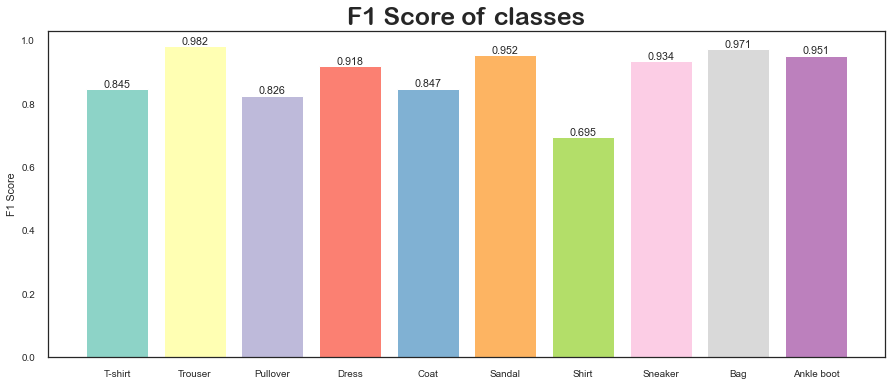

In [108]:
f1 = f1_score(final_y_test, predfinal, average=None)
pr = precision_score(final_y_test, predfinal, average=None)
re = recall_score(final_y_test, predfinal, average=None)
sns.set_style("white")
fig = plt.figure(1,figsize=(15,6))
my_cmap = plt.get_cmap("Set3")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
ax=plt.bar(class_names, f1,color=my_cmap.colors)
plt.ylabel("F1 Score")
plt.title("F1 Score of classes",fontsize = 25, fontweight='bold',fontfamily='Arial Rounded MT Bold')
plt.bar_label(ax,fmt='%1.3f')
sns.set(font_scale=0.9)


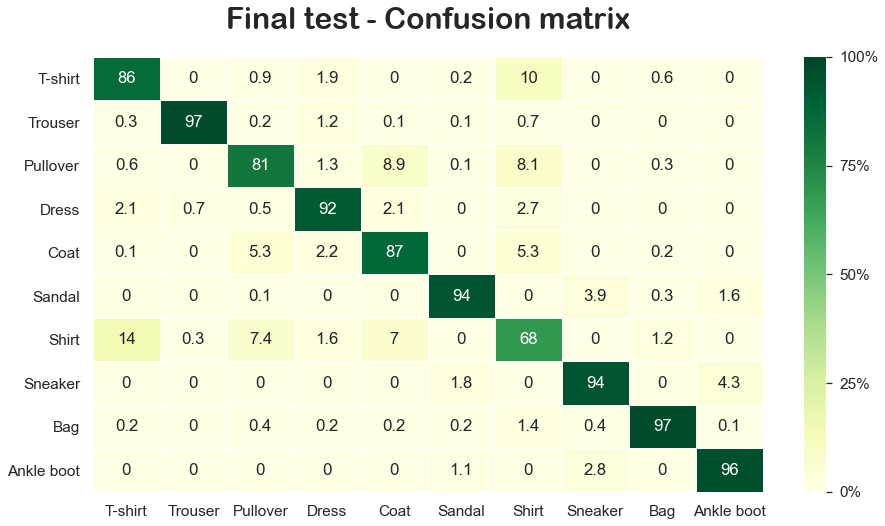

In [110]:
df_cnm=confusion_matrix(final_y_test,predfinal,normalize='true')
plt.figure(figsize = (15,8))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="YlGn",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('Final test - Confusion matrix', fontsize = 30, fontweight='bold',
          fontfamily='Arial Rounded MT Bold',y = 1.05)
plt.show()